In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
#reaching counties area data and forming the dataframe
path_area = "C:/Users/Mehmet/Desktop/data/us_rental_data/counties_area.csv"
df = pd.read_csv(path_area).dropna().reset_index()
df.drop('index',axis=1,inplace=True)
df.columns= ['County','State','Land Area(sq mi,2011)']

In [3]:
#reaching counties population data and forming the dataframe
path_popul = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_residential_population.csv"
population = pd.read_csv(path_popul).dropna().reset_index()
population.drop('index',axis=1,inplace=True)

In [4]:
# Concating the population data to main data frame
df['Resident Population(2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==population.iloc[i,0]:
        df.iloc[i,-1] =population.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [5]:
# Generating density column
df['Density(sq mi / People )']=round(df['Resident Population(2010)']/df['Land Area(sq mi,2011)'],2)

In [6]:
# Concating the population change data to main data frame
df['Population Change(%,2000-2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==population.iloc[i,0]:
        df.iloc[i,-1] =population.iloc[i,3]
    else:
        df.iloc[i,-1] = np.nan

In [7]:
#reaching counties crime data and forming the dataframe
path_crime = "C:/Users/Mehmet/Desktop/data/us_rental_data/counties_crime_reported_police.csv"
crime = pd.read_csv(path_crime).dropna().reset_index()
crime.drop('index',axis=1,inplace=True)

In [8]:
# Concating the crime data to main data frame
df['Crime Report to Police(2008)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==crime.iloc[i,0]:
        df.iloc[i,-1] =crime.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [9]:
# Generating per capita crime report column
df['Per Capita Crime Report'] = round(df['Crime Report to Police(2008)']/df['Resident Population(2010)'],4)

In [10]:
#reaching counties university student enrollment data and forming the dataframe
path_university_enrollment = "C:/Users/Mehmet/Desktop/data/us_rental_data/counties_undergraduate_graduate_enrollment.csv"
university_enrollment = pd.read_csv(path_university_enrollment).dropna().reset_index()
university_enrollment.drop('index',inplace=True,axis=1)

In [11]:
# striping space on the data
university_enrollment.iloc[:,2] = university_enrollment.iloc[:,2].apply(lambda x: int(x.strip().replace(',','').replace('-','0')) )
university_enrollment.iloc[:,3] = university_enrollment.iloc[:,3].apply(lambda x: int(x.strip().replace(',','').replace('-','0')) )

In [12]:
# Concating the university student enrolment data to main data frame
df['University Student Enrollment'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==university_enrollment.iloc[i,0]:
        df.iloc[i,-1] =int(university_enrollment.iloc[i,2])+int(university_enrollment.iloc[i,3])
    else:
        df.iloc[i,-1] = np.nan

In [13]:
#generating per capita university student enrollment
df['University Student Concentration(%)'] = round(df['University Student Enrollment']/df['Resident Population(2010)']*100,2)

In [14]:
# reaching the building permit data
path_building_permit = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_building_permit.csv"
building_permit = pd.read_csv(path_building_permit).reset_index()
building_permit.drop(['index','Unnamed: 2'],axis=1,inplace=True)
building_permit.dropna(inplace=True)

In [15]:
# Concating the building permit data to main data frame
df['Building Permit(2010)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==building_permit.iloc[i,0]:
        df.iloc[i,-1] =building_permit.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [16]:
# generating per capita building permit data
df['Per Capita Building Permit(2010)'] = round(df['Building Permit(2010)']/df['Resident Population(2010)'],4)

In [17]:
# reaching the median age data 
path_median_age = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_median_age.csv"
median_age = pd.read_csv(path_median_age).dropna().reset_index()
median_age.drop('index',axis=1,inplace=True)

In [18]:
# Concating the median age data to main data frame
df['Median Age(2010)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==median_age.iloc[i,0]:
        df.iloc[i,-1] =median_age.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [19]:
# reaching the per capita income data data 
path_per_capita_income = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_per_capita_income.csv"
per_capita_income = pd.read_csv(path_per_capita_income).dropna().reset_index()
per_capita_income.drop('index',axis=1,inplace=True)

In [20]:
#concating the per capita income data to main data frame
df['Per Capita Income(2009)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==per_capita_income.iloc[i,0]:
        df.iloc[i,-1] = per_capita_income.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [21]:
# reaching the race data
path_race = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_race.csv"
race = pd.read_csv(path_race).dropna().reset_index()
race.drop('index',axis=1,inplace=True)

In [22]:
# concating the race data to main data frame
df['White Population Consentration(2009,(%))'] = 0
df['Black Population Consentration(2009,(%))'] = 0
df['Asian Population Consentration(2009,(%))'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-3] = race.iloc[i,2]
    else:
        df.iloc[i,-3] = np.nan

for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-2] = race.iloc[i,3]
    else:
        df.iloc[i,-2] = np.nan
        
        
for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-1] = race.iloc[i,4]
    else:
        df.iloc[i,-1] = np.nan

In [23]:
# generating other race data column
df['Other Race Population Consentration(2009,(%))'] = round(100-(df.iloc[:,-1]+df.iloc[:,-2]+df.iloc[:,-3]),2)
df['Non_White Population Consentration(2009,(%))'] = 100 - df['White Population Consentration(2009,(%))']

In [24]:
#reaching vacant occupied data
path_vacant_occupied_home= "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_vacant_occupied_medianroom.csv"
vacant_occupied_home = pd.read_csv(path_vacant_occupied_home).reset_index()
vacant_occupied_home.drop(['index','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)
vacant_occupied_home.dropna(inplace=True)

In [25]:
# concating occopied and vacant house data to main data frame
df['Median Room Number of the Houses(2009)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,3]
    else:
        df.iloc[i,-1] = np.nan
        
df['Vacant Housing Units(2010)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan
        
df['Occupied Housing Units(2010)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,4]
    else:
        df.iloc[i,-1] = np.nan

In [26]:
# stripping the spaces on the data
df['Vacant Housing Units(2010)']=df['Vacant Housing Units(2010)'].apply(lambda x: int(x))
df['Occupied Housing Units(2010)'] = df['Occupied Housing Units(2010)'].apply(lambda x: int(x))


In [27]:
# generating per capita vacant and occupied housing data
df['Vacant Housing Rate(%,2010)'] = round(df['Vacant Housing Units(2010)']/(df['Vacant Housing Units(2010)']+df['Occupied Housing Units(2010)'] )*100,2)
df['Per Capita Vacant Housing(2010)'] = round(df['Vacant Housing Units(2010)']/df['Resident Population(2010)'],4)

In [28]:
# reaching unemployment data
path_unemployment = "C:/Users/Mehmet/Desktop/data/us_rental_data/us_counties_unemployment.csv"
unemployment = pd.read_csv(path_unemployment).dropna().reset_index()
unemployment.drop('index',axis=1,inplace=True)

In [29]:
# concating unemployment data to the main data frame
df['Unemployment Rate(2010,(%))'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==unemployment.iloc[i,0]:
        df.iloc[i,-1] = unemployment.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [30]:
#reaching average house hold data
path_average_household_size ="C:/Users/Mehmet/Desktop/data/us_rental_data/average_household_size.csv"
average_household_size = pd.read_csv(path_average_household_size).dropna().reset_index()
average_household_size.drop('index',axis=1,inplace=True)

In [31]:
# concating average house hold data to main data frame
df['Average Household Size']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==average_household_size.iloc[i,0]:
        df.iloc[i,-1] =average_household_size.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [32]:
# reaching renter_occupied_data
path_renter_occupied_housing_units = "C:/Users/Mehmet/Desktop/data/us_rental_data/renter_occupied_housing_units.csv"
renter_occupied_housing_units = pd.read_csv(path_renter_occupied_housing_units).dropna().reset_index()
renter_occupied_housing_units.drop('index',axis=1,inplace=True)

In [33]:
# concating renter occpied data to the main data frame
df['Renter Occupied Housing Units(2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==renter_occupied_housing_units.iloc[i,0]:
        df.iloc[i,-1] =renter_occupied_housing_units.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [34]:
#generating renter occupied housing data
df['Renter Occpied Housing Rate(2010)'] = round(df['Renter Occupied Housing Units(2010)']/df['Occupied Housing Units(2010)']*100,2)

In [35]:
#reaching median gross cash paying rent
path_median_rent = "C:/Users/Mehmet/Desktop/data/us_rental_data/median_gross_paying_cash_rent.csv"
median_rent = pd.read_csv(path_median_rent).dropna().reset_index()
median_rent.drop('index',axis=1,inplace=True)

In [36]:
#concating median gross paying data to the main data frame
df['Median Cash Paid Rent(2005-2009)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==median_rent.iloc[i,0]:
        df.iloc[i,-1] =median_rent.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [37]:
# Checking total data (some data have 3 missing observations)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   County                                         3145 non-null   object 
 1   State                                          3145 non-null   object 
 2   Land Area(sq mi,2011)                          3145 non-null   float64
 3   Resident Population(2010)                      3145 non-null   int64  
 4   Density(sq mi / People )                       3142 non-null   float64
 5   Population Change(%,2000-2010)                 3145 non-null   float64
 6   Crime Report to Police(2008)                   3145 non-null   int64  
 7   Per Capita Crime Report                        3142 non-null   float64
 8   University Student Enrollment                  3145 non-null   int64  
 9   University Student Concentration(%)            3142 

In [38]:
# Checking nan values
df.isna().any()
# the columns that have missing values
df.columns[df.isna().any()]

Index(['Density(sq mi / People )', 'Per Capita Crime Report',
       'University Student Concentration(%)',
       'Per Capita Building Permit(2010)', 'Vacant Housing Rate(%,2010)',
       'Per Capita Vacant Housing(2010)', 'Renter Occpied Housing Rate(2010)'],
      dtype='object')

In [39]:
# Total misisng values on the data
df.dropna(inplace=True)
df.isna().sum()

County                                           0
State                                            0
Land Area(sq mi,2011)                            0
Resident Population(2010)                        0
Density(sq mi / People )                         0
Population Change(%,2000-2010)                   0
Crime Report to Police(2008)                     0
Per Capita Crime Report                          0
University Student Enrollment                    0
University Student Concentration(%)              0
Building Permit(2010)                            0
Per Capita Building Permit(2010)                 0
Median Age(2010)                                 0
Per Capita Income(2009)                          0
White Population Consentration(2009,(%))         0
Black Population Consentration(2009,(%))         0
Asian Population Consentration(2009,(%))         0
Other Race Population Consentration(2009,(%))    0
Non_White Population Consentration(2009,(%))     0
Median Room Number of the House

In [40]:
# descriptive statistic of the data
for i in df.columns:
    df[i].describe()

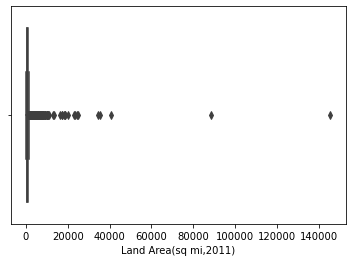

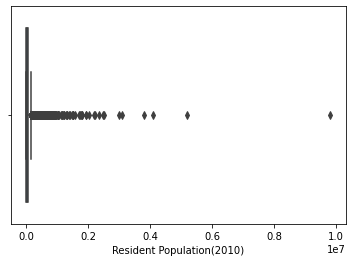

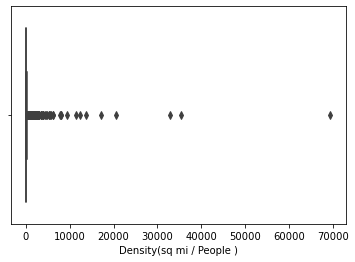

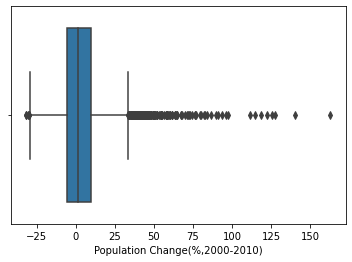

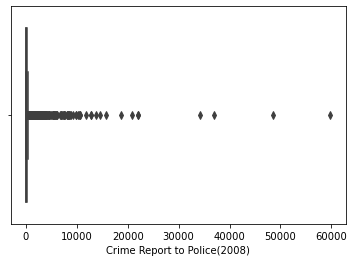

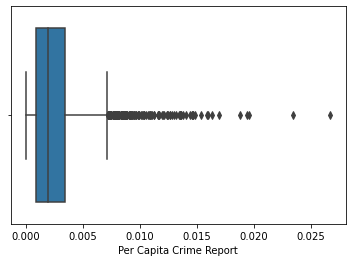

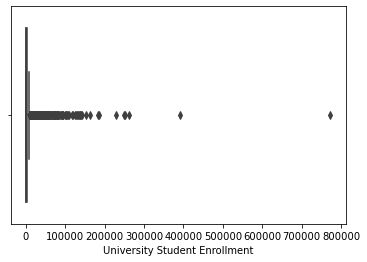

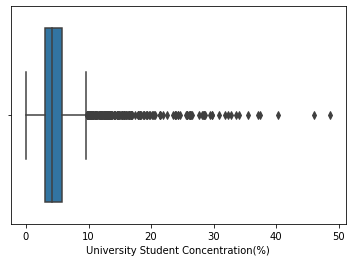

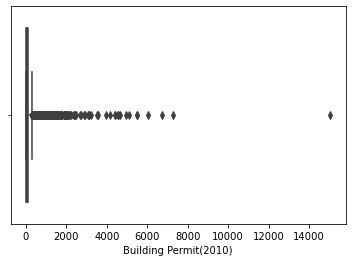

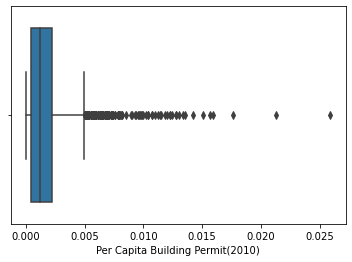

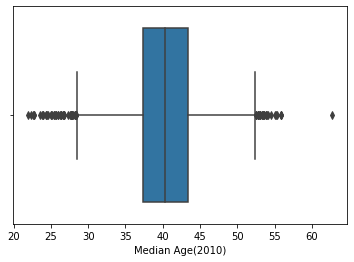

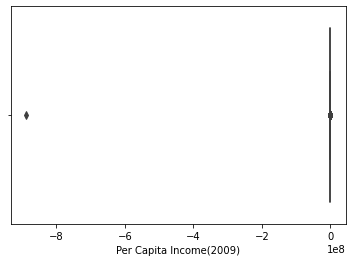

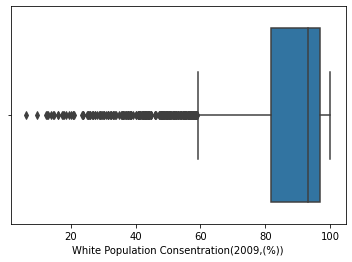

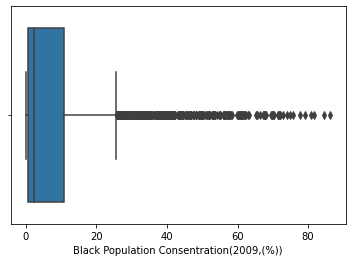

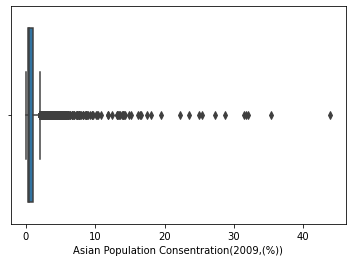

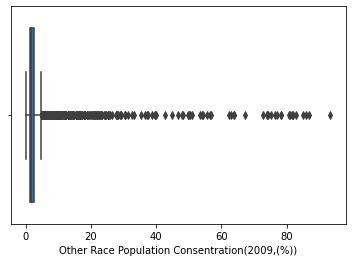

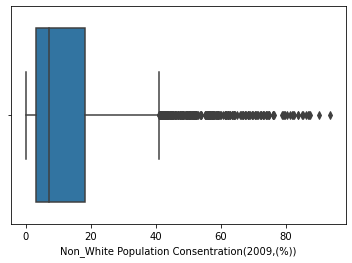

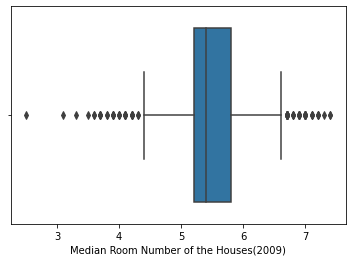

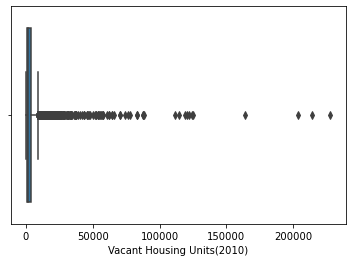

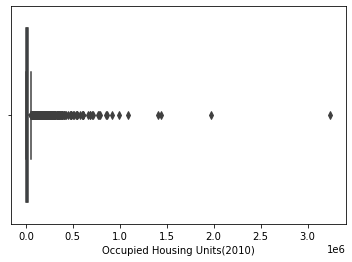

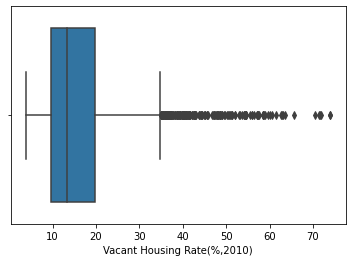

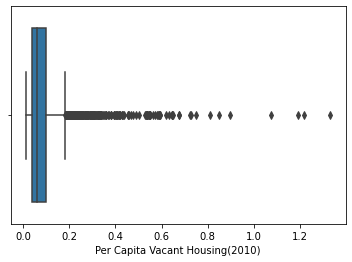

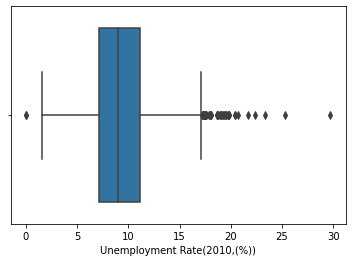

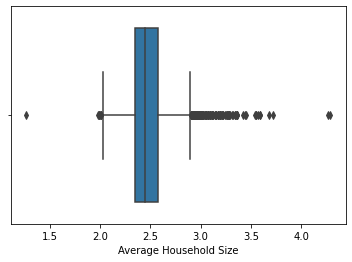

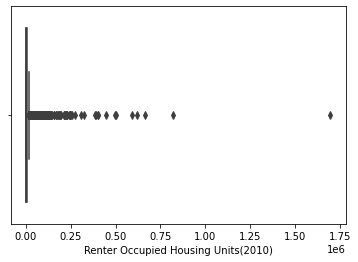

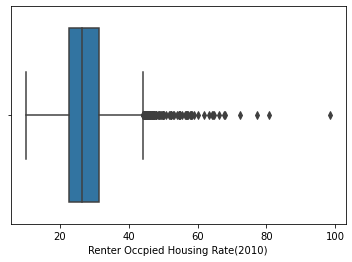

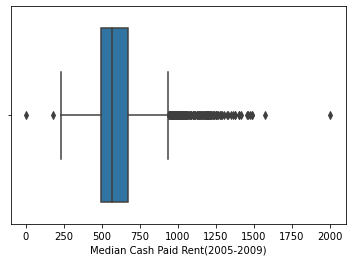

In [41]:
# visualizing descriptive data
for i in df.describe().columns:
    sns.boxplot(x=df[i])
    plt.show()

In [42]:
#removing ot;liers on the some data
df['z_score']=stats.zscore(df['Resident Population(2010)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>3].count()))
df = df.loc[df['z_score'].abs()<=3]
df.drop('z_score',inplace=True,axis=1)  

df['z_score']=stats.zscore(df['Density(sq mi / People )'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>3].count()))
df = df.loc[df['z_score'].abs()<=3]
df.drop('z_score',inplace=True,axis=1)



df['z_score']=stats.zscore(df['Median Age(2010)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>4].count()))
df = df.loc[df['z_score'].abs()<=4]
df.drop('z_score',inplace=True,axis=1)

df['z_score']=stats.zscore(df['Median Room Number of the Houses(2009)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>4].count()))
df = df.loc[df['z_score'].abs()<=4]
df.drop('z_score',inplace=True,axis=1)


df['z_score']=stats.zscore(df['Unemployment Rate(2010,(%))'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>4].count()))
df = df.loc[df['z_score'].abs()<=4]
df.drop('z_score',inplace=True,axis=1)



df['z_score']=stats.zscore(df['Average Household Size'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>5].count()))
df = df.loc[df['z_score'].abs()<=5]
df.drop('z_score',inplace=True,axis=1)


df['z_score']=stats.zscore(df['Renter Occpied Housing Rate(2010)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>5].count()))
df = df.loc[df['z_score'].abs()<=5]
df.drop('z_score',inplace=True,axis=1)


df['z_score']=stats.zscore(df['Median Cash Paid Rent(2005-2009)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>5].count()))
df = df.loc[df['z_score'].abs()<=5]
df.drop('z_score',inplace=True,axis=1)


df['z_score']=stats.zscore(df['Per Capita Vacant Housing(2010)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>6].count()))
df = df.loc[df['z_score'].abs()<=6]
df.drop('z_score',inplace=True,axis=1)

df['z_score']=stats.zscore(df['Per Capita Income(2009)'])
print('The number of outlier is {}.'.format(df['z_score'][df['z_score'].abs()>5].count()))
df = df.loc[df['z_score'].abs()<=5]
df.drop('z_score',inplace=True,axis=1)

The number of outlier is 37.
The number of outlier is 38.
The number of outlier is 1.
The number of outlier is 12.
The number of outlier is 4.
The number of outlier is 7.
The number of outlier is 3.
The number of outlier is 4.
The number of outlier is 11.
The number of outlier is 1.


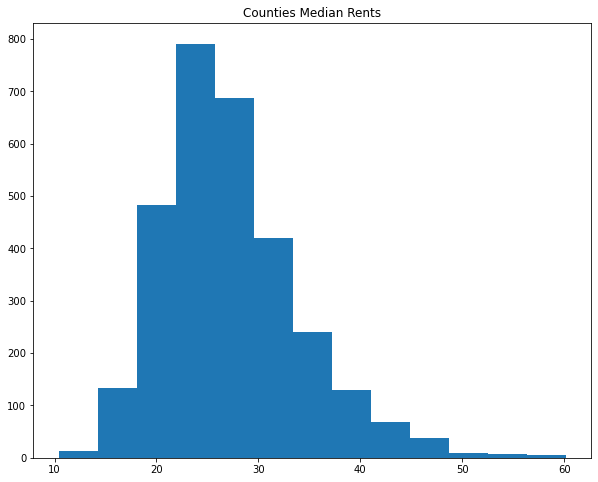

In [43]:
bins = int(round(1 + (3.322*np.log10(len(df)))))

fig= plt.figure(figsize=(10,8))
plt.hist(df.iloc[:,27].values,bins=bins)
plt.xlabel = 'Median Rents'
plt.ylabel = 'Frequency'
plt.title('Counties Median Rents')
plt.show()

In [44]:
# data columns and index values
for i in enumerate(df.columns):
    print(i)    

(0, 'County')
(1, 'State')
(2, 'Land Area(sq mi,2011)')
(3, 'Resident Population(2010)')
(4, 'Density(sq mi / People )')
(5, 'Population Change(%,2000-2010)')
(6, 'Crime Report to Police(2008)')
(7, 'Per Capita Crime Report')
(8, 'University Student Enrollment')
(9, 'University Student Concentration(%)')
(10, 'Building Permit(2010)')
(11, 'Per Capita Building Permit(2010)')
(12, 'Median Age(2010)')
(13, 'Per Capita Income(2009)')
(14, 'White Population Consentration(2009,(%))')
(15, 'Black Population Consentration(2009,(%))')
(16, 'Asian Population Consentration(2009,(%))')
(17, 'Other Race Population Consentration(2009,(%))')
(18, 'Non_White Population Consentration(2009,(%))')
(19, 'Median Room Number of the Houses(2009)')
(20, 'Vacant Housing Units(2010)')
(21, 'Occupied Housing Units(2010)')
(22, 'Vacant Housing Rate(%,2010)')
(23, 'Per Capita Vacant Housing(2010)')
(24, 'Unemployment Rate(2010,(%))')
(25, 'Average Household Size')
(26, 'Renter Occupied Housing Units(2010)')
(27, '

In [45]:
#Feature and target
y = df.iloc[:,28]
X = df.iloc[:,[4,5,7,9,11,12,13,14,15,16,17,18,19,22,23,24,25,27]]

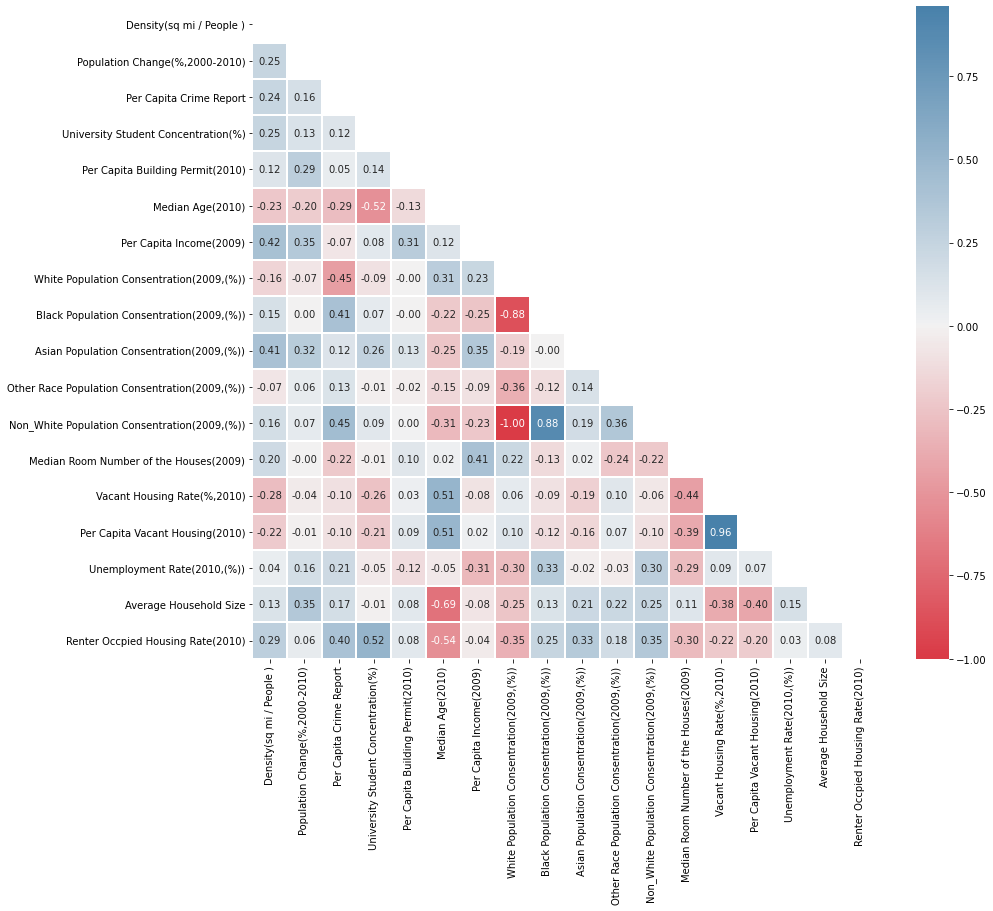

In [46]:
# Correlation Matrix and visualazing it on heat map
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
figure = plt.figure(figsize=(14,12))
sns.heatmap(X.corr(), mask=mask,center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")
plt.show()

In [47]:
# making transformation on some data
X['log(Per Capita Income)'] = X['Per Capita Income(2009)'].apply(lambda x: np.log(x))
X['sqrd(Per Capita Income)'] = X['Per Capita Income(2009)'].apply(lambda x: (x)**0.5)
X['sqrd(University Student Concentration(%))'] = X['University Student Concentration(%)'].apply(lambda x: (x)**0.5)
X['sqr(University Student Concentration(%))'] = X['University Student Concentration(%)'].apply(lambda x: (x)**2)
X['sqrd(Per Capita Crime Report)'] = X['Per Capita Crime Report'].apply(lambda x: (x)**0.5)
X['sqr(Per Capita Crime Report)'] = X['Per Capita Crime Report'].apply(lambda x: (x)**2)
X['sqrd(University Student Concentration(%))'] = X['University Student Concentration(%)'].apply(lambda x: (x)**0.5)
X['sqr(University Student Concentration(%))'] = X['University Student Concentration(%)'].apply(lambda x: (x)**2)
X['sqrd(Per Capita Building Permit(2010))'] = X['Per Capita Building Permit(2010)'].apply(lambda x: (x)**0.5)
X['sqr(Per Capita Building Permit(2010)'] = X['Per Capita Building Permit(2010)'].apply(lambda x: (x)**2)
X['sqrd(Per Capita Vacant Housing(2010))'] = X['Per Capita Vacant Housing(2010)'].apply(lambda x: (x)**0.5)
X['sqr(Per Capita Vacant Housing(2010))'] = X['Per Capita Vacant Housing(2010)'].apply(lambda x: (x)**2)
X['sqrd(Density(sq mi / People )'] = X['Density(sq mi / People )'].apply(lambda x: (x)**0.5)
X['sqrd(Median Room Number of the Houses(2009))'] = X['Median Room Number of the Houses(2009)'].apply(lambda x: (x)**0.5)

In [48]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [49]:
# data columns and index values
for i in enumerate(X_train.columns):
    print(i)    

(0, 'Density(sq mi / People )')
(1, 'Population Change(%,2000-2010)')
(2, 'Per Capita Crime Report')
(3, 'University Student Concentration(%)')
(4, 'Per Capita Building Permit(2010)')
(5, 'Median Age(2010)')
(6, 'Per Capita Income(2009)')
(7, 'White Population Consentration(2009,(%))')
(8, 'Black Population Consentration(2009,(%))')
(9, 'Asian Population Consentration(2009,(%))')
(10, 'Other Race Population Consentration(2009,(%))')
(11, 'Non_White Population Consentration(2009,(%))')
(12, 'Median Room Number of the Houses(2009)')
(13, 'Vacant Housing Rate(%,2010)')
(14, 'Per Capita Vacant Housing(2010)')
(15, 'Unemployment Rate(2010,(%))')
(16, 'Average Household Size')
(17, 'Renter Occpied Housing Rate(2010)')
(18, 'log(Per Capita Income)')
(19, 'sqrd(Per Capita Income)')
(20, 'sqrd(University Student Concentration(%))')
(21, 'sqr(University Student Concentration(%))')
(22, 'sqrd(Per Capita Crime Report)')
(23, 'sqr(Per Capita Crime Report)')
(24, 'sqrd(Per Capita Building Permit(201

In [50]:
# features without transformation
Z0 = X_train.iloc[:,[0,1,2,3,4,6,8,9,10,12,14,15,16,17]]
Z0 = add_constant(Z0)

In [51]:
#Checking multi correlation

In [52]:
# For each X, calculate VIF and save in dataframe
vif_Z0 = pd.DataFrame()
vif_Z0["VIF Factor"] = [variance_inflation_factor(Z0.values, i) for i in range(Z0.shape[1])]
vif_Z0["features"] = Z0.columns
vif_Z0.round(2)

,VIF Factor,features
0,812.52,const
1,1.73,Density(sq mi / People )
2,1.71,"Population Change(%,2000-2010)"
3,1.51,Per Capita Crime Report
4,1.61,University Student Concentration(%)
5,1.26,Per Capita Building Permit(2010)
6,2.54,Per Capita Income(2009)
7,1.50,"Black Population Consentration(2009,(%))"
8,2.01,"Asian Population Consentration(2009,(%))"
9,1.28,"Other Race Population Consentration(2009,(%))"


In [53]:
# The first model
mod = sm.OLS(y_train, Z0)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                                   OLS Regression Results                                   
Dep. Variable:     Median Cash Paid Rent(2005-2009)   R-squared:                       0.736
Model:                                          OLS   Adj. R-squared:                  0.734
Method:                               Least Squares   F-statistic:                     388.1
Date:                              Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                                      14:17:58   Log-Likelihood:                -11392.
No. Observations:                              1965   AIC:                         2.281e+04
Df Residuals:                                  1950   BIC:                         2.290e+04
Df Model:                                        14                                         
Covariance Type:                          nonrobust                                         
                                                    coef    std err   

In [54]:
#In the first model, some parameters p values are higher than 0.05, therefore rootsquare transformation implied and run again.

In [55]:
# Second model with some stanformed data
Z1 = X_train.iloc[:,[0,1,6,8,9,10,14,15,16,17,24,20,22]]
Z1 = add_constant(Z1)

In [56]:
#Checking multi correlation

In [57]:
# For each X, calculate VIF and save in dataframe
vif_Z1 = pd.DataFrame()
vif_Z1["VIF Factor"] = [variance_inflation_factor(Z1.values, i) for i in range(Z1.shape[1])]
vif_Z1["features"] = Z1.columns
vif_Z1.round(2)

,VIF Factor,features
0,467.52,const
1,1.72,Density(sq mi / People )
2,1.68,"Population Change(%,2000-2010)"
3,2.26,Per Capita Income(2009)
4,1.45,"Black Population Consentration(2009,(%))"
5,1.98,"Asian Population Consentration(2009,(%))"
6,1.26,"Other Race Population Consentration(2009,(%))"
7,1.51,Per Capita Vacant Housing(2010)
8,1.43,"Unemployment Rate(2010,(%))"
9,1.74,Average Household Size


In [58]:
# The second model
mod1 = sm.OLS(y_train, Z1)    # Describe model
res1 = mod1.fit()       # Fit model
print(res1.summary())   # Summarize model

                                   OLS Regression Results                                   
Dep. Variable:     Median Cash Paid Rent(2005-2009)   R-squared:                       0.740
Model:                                          OLS   Adj. R-squared:                  0.739
Method:                               Least Squares   F-statistic:                     428.0
Date:                              Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                                      14:17:58   Log-Likelihood:                -11375.
No. Observations:                              1965   AIC:                         2.278e+04
Df Residuals:                                  1951   BIC:                         2.286e+04
Df Model:                                        13                                         
Covariance Type:                          nonrobust                                         
                                                    coef    std err   

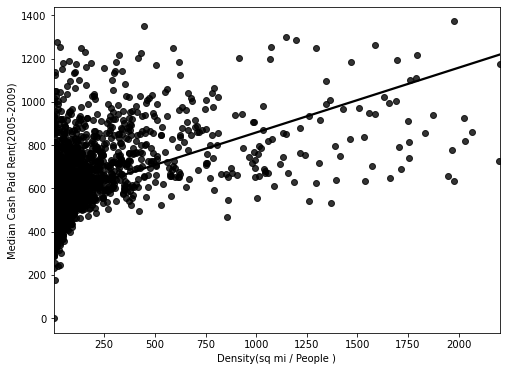

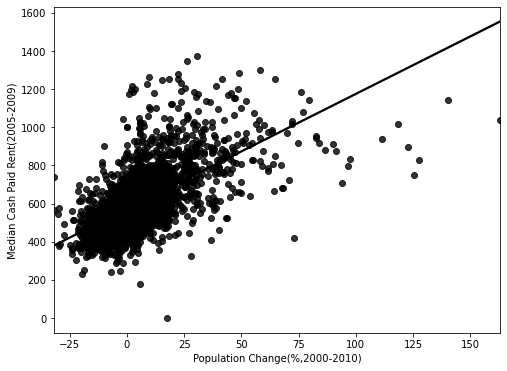

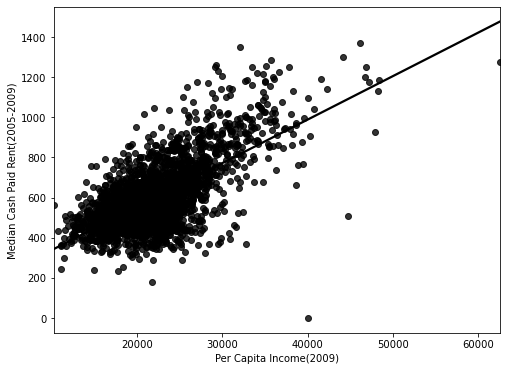

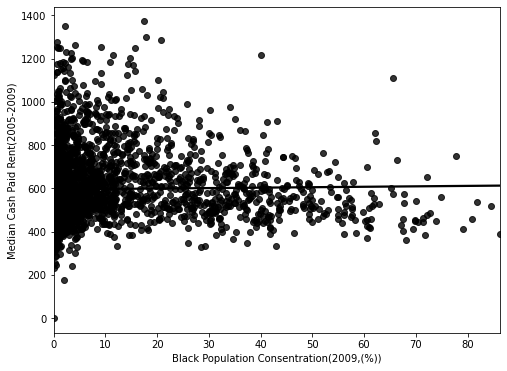

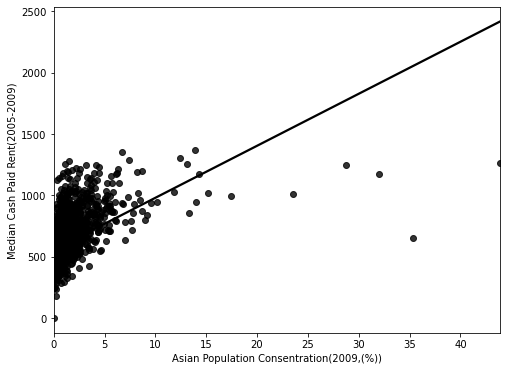

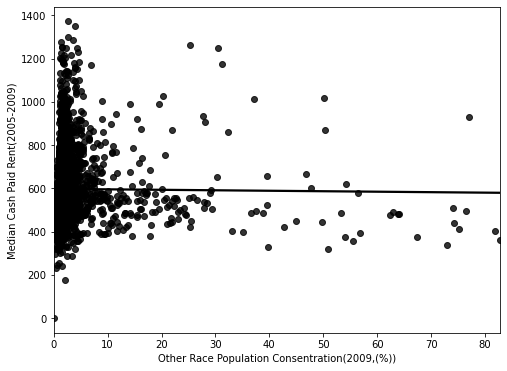

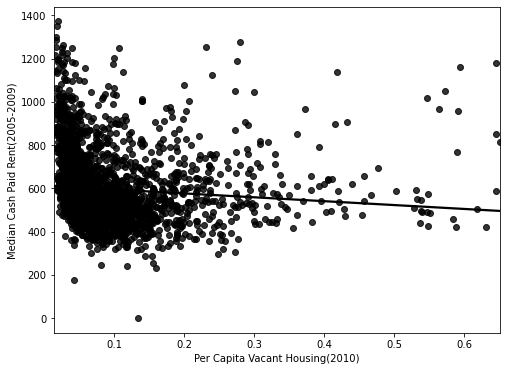

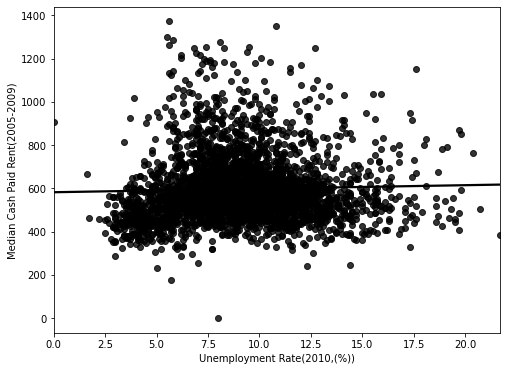

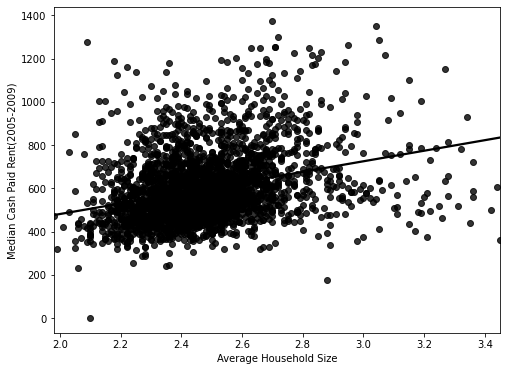

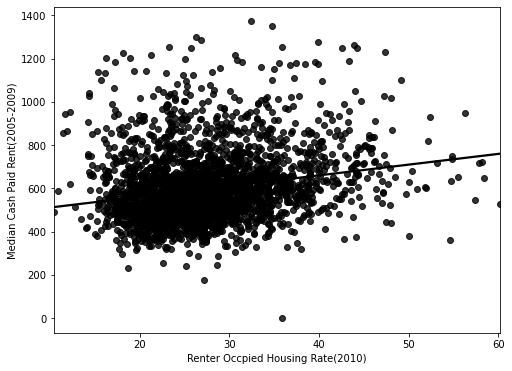

In [59]:
#Indent variables against depend variable
for i in Z1.columns[1:-3]:
    fig = plt.figure(figsize=(8,6))
    sns.regplot(x=i,y='Median Cash Paid Rent(2005-2009)',data=df,ci=None,color='black')
    plt.show()

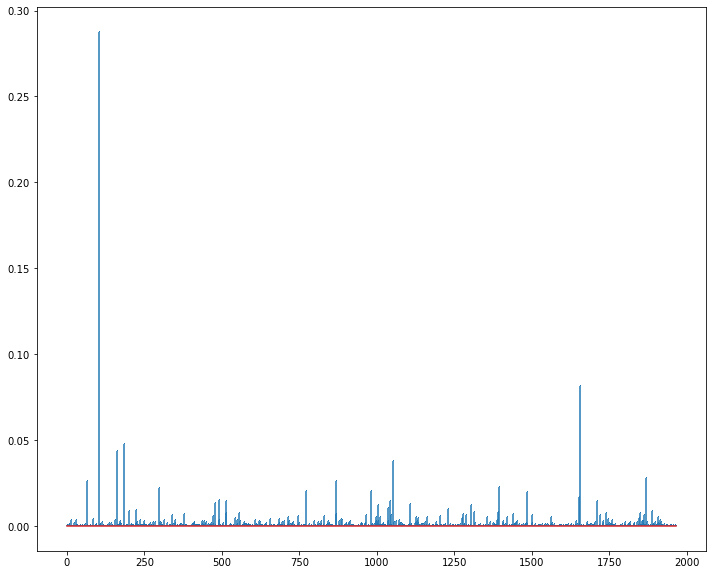

In [60]:
#c is the distance and p is p-value
influence = res1.get_influence()
(c, p) = influence.cooks_distance
figure = plt.figure(figsize=(12,10))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()

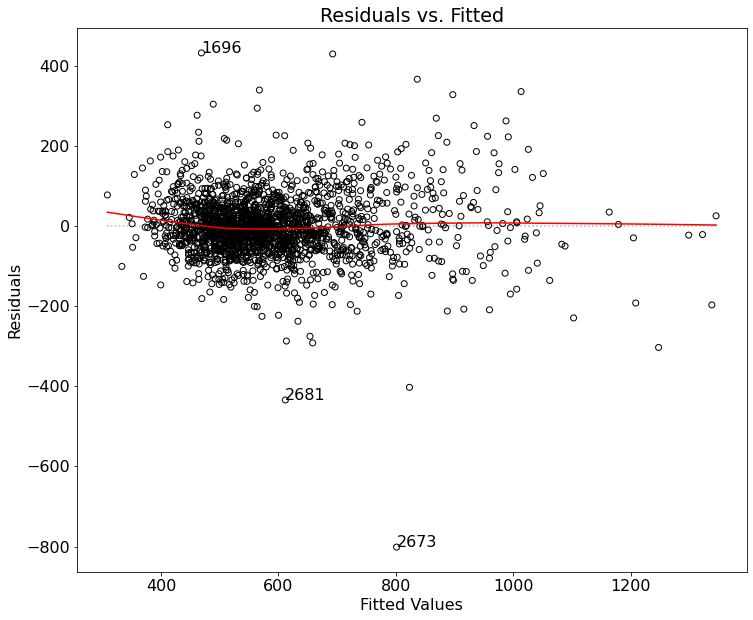

In [61]:
# Residuals vs. Fitting ; it is a the simpliest way to see ouliers in the model:The US metropols and subarbs totaly
#different demographic and geographical characteristics that causes outliers inthis model. Removing them definetly can
#increase the model's statistical quality, however reduces its robutness of prediction success. In order to have balance for
# between statistical quality and robutness of prediction success, I kept some outliers in the model.
from statsmodels.nonparametric.smoothers_lowess import lowess
residuals = res1.resid
fitted = res1.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12,10)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

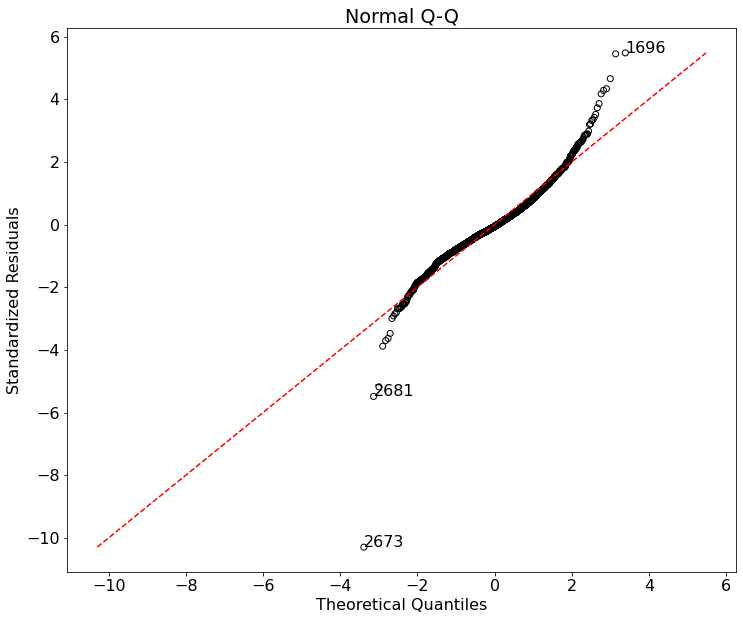

In [62]:
# One of the ols assumption is that residuals follow normal disturbution. As seen from the Q-Q plot chart the outliers make
# problem for this assumption.
sorted_student_residuals = pd.Series(res1.get_influence().resid_studentized_internal)
sorted_student_residuals.index = res1.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

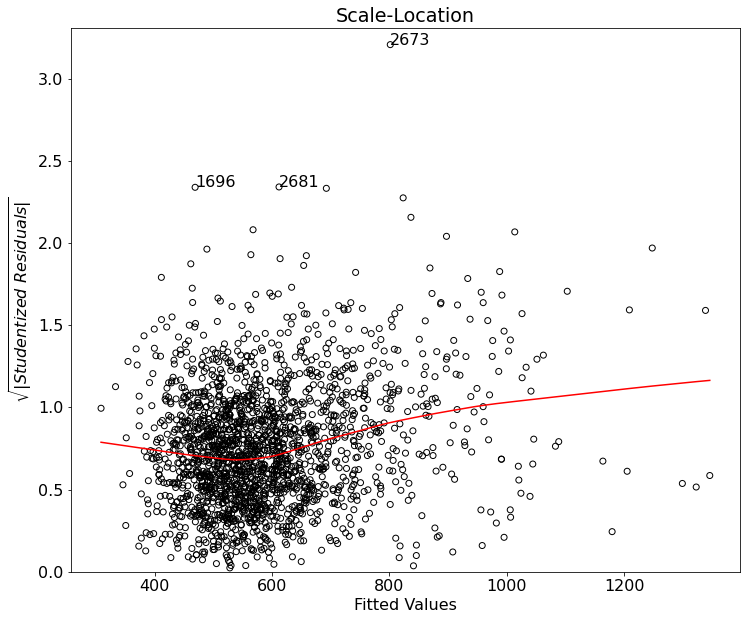

In [63]:
# Now we can test the assumption of homoskedasticity using the scale-location plot. Since the scatter in the plots is consistent
# across the entire range of fitted values, then we can safely assume that the data fit the assumption of homoskedasticity.
student_residuals = res1.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = res1.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

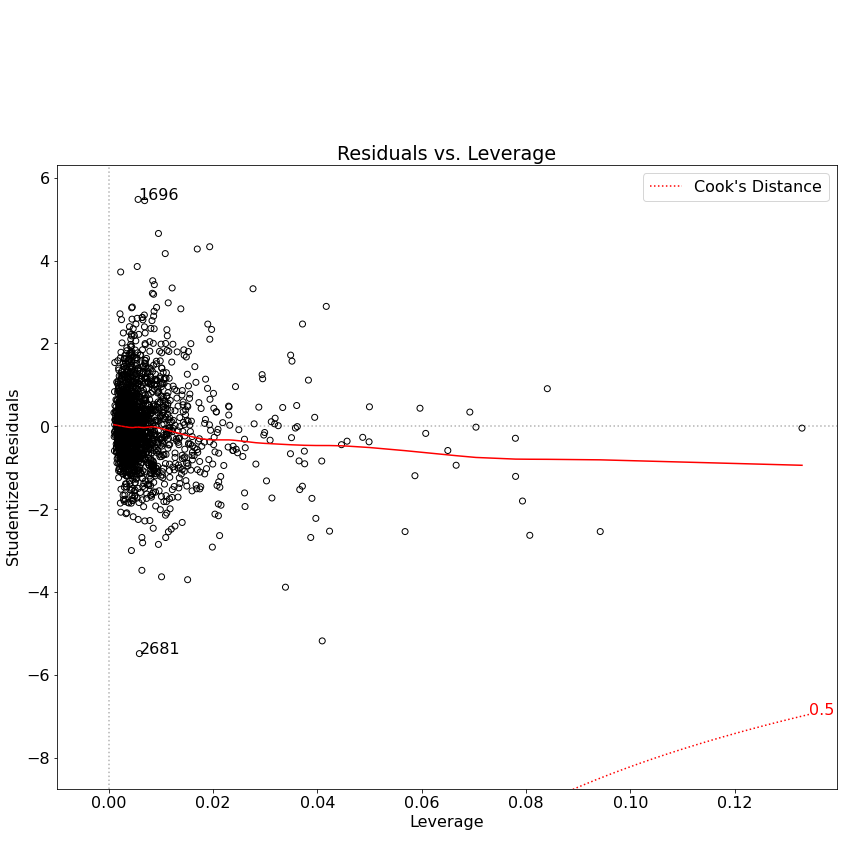

In [64]:
#the residuals vs. leverage plot with the cook's distance.There is no sign that outliers cause significant leverage effect
student_residuals = pd.Series(res1.get_influence().resid_studentized_internal)
student_residuals.index = res1.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = res1.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots(figsize=(12,10))
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(res.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

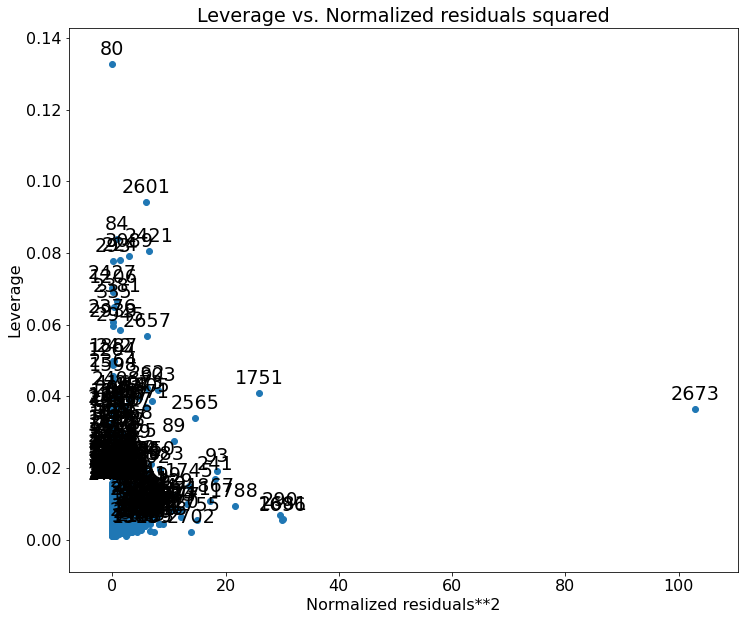

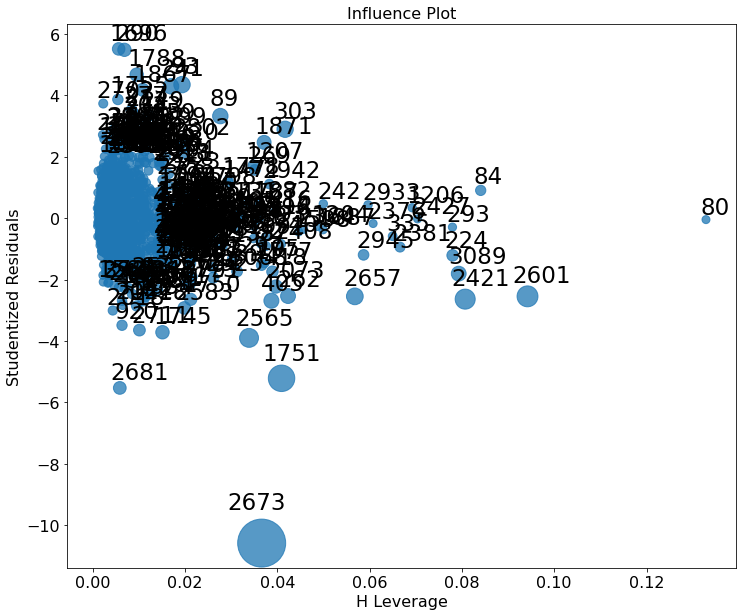

In [65]:
# Levearge vs. normalized residuals squared confirms leverage influance is not significant
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(res1)
influence_plot(res1)
plt.show()

In [66]:
# test data for second model
Z1_test = X_test.iloc[:,[0,1,6,8,9,10,14,15,16,17,24,20,22]]
Z1_test = add_constant(Z1_test)

In [67]:
#predictions
pred=res1.predict(Z1_test)

In [68]:
pred_act = pd.concat([pred,y_test],axis=1).round(2)
pred_act.columns=['Prediction','Actual']
pred_act.reset_index(drop=True,inplace=True)


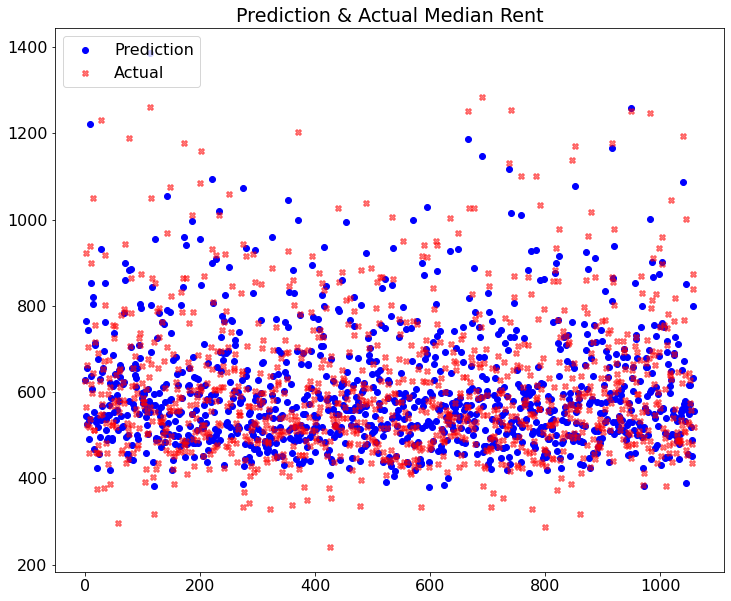

In [69]:
fig = plt.figure(figsize=(12,10))
plt.scatter(y=pred_act['Prediction'],x=pred_act.index, color='blue',marker='o',label='Prediction')
plt.scatter(y=pred_act['Actual'],x=pred_act.index, color='red', alpha=0.5,marker='X',label='Actual')
plt.title('Prediction & Actual Median Rent')
plt.legend(loc=2)
plt.show()

In [70]:
# fitted values
fitted_values = res1.fittedvalues

In [71]:
# residuals
residuals = res1.resid

In [72]:
# mse and rse
mse = res1.mse_resid
rse = np.sqrt(mse)
print('MSE:{}'.format(round(mse,2)))
print('RSE:{}'.format(round(rse,2)))

MSE:6289.66
RSE:79.31


In [94]:
#Variables Impact with Mean Values
Coefficients_Impact = pd.DataFrame(X.loc[:,Z1.columns[1:]].mean()*res1.params[1:])
Coefficients_Impact.columns=['Variables Impact with Mean Values']
# Last three variables are suquare root, therefore we should square them
Coefficients_Impact[-3:] = Coefficients_Impact[-3:].apply(lambda x: (x)**2)
Coefficients_Impact.sort_values(by='Variables Impact with Mean Values',ascending=False).round(2) 

,Variables Impact with Mean Values
sqrd(University Student Concentration(%)),2174.11
Average Household Size,389.49
Per Capita Income(2009),368.45
sqrd(Per Capita Crime Report),168.65
sqrd(Per Capita Building Permit(2010)),53.88
Renter Occpied Housing Rate(2010),41.86
"Unemployment Rate(2010,(%))",41.09
"Asian Population Consentration(2009,(%))",11.78
"Population Change(%,2000-2010)",9.97
Per Capita Vacant Housing(2010),6.99


<Figure size 864x720 with 0 Axes>

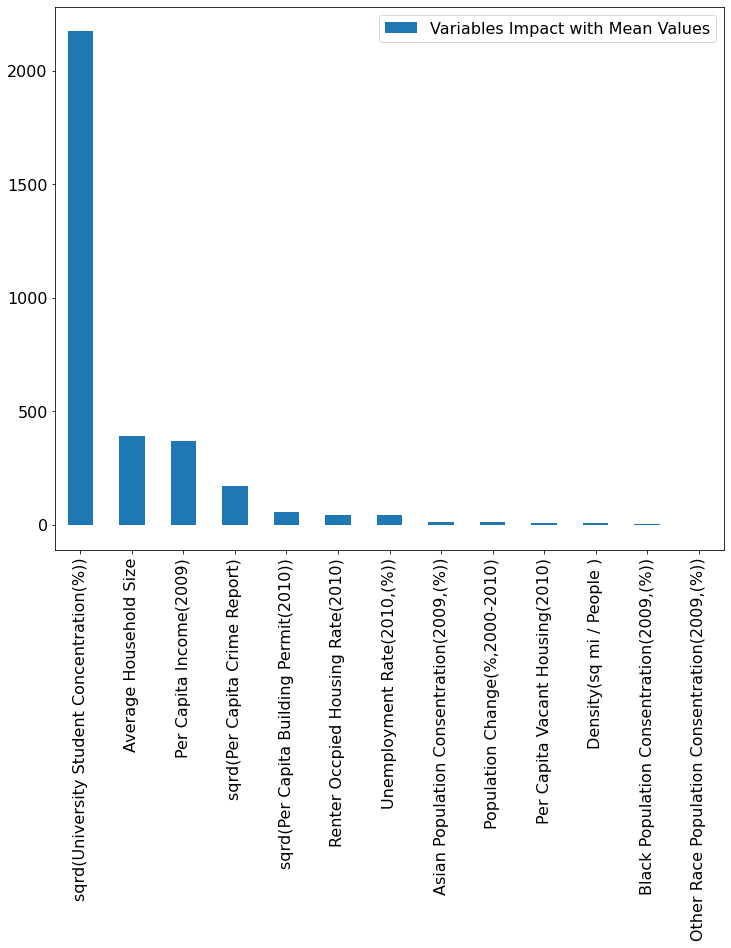

In [100]:
sorted_df = Coefficients_Impact.sort_values(by='Variables Impact with Mean Values',ascending=False).round(2)
fig = plt.figure(figsize=(12,10))
sorted_df.plot.bar() 
plt.show()